<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_SAMTARBUCKS/blob/main/Tang_NLP_kuggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # 넘파이
import pandas as pd # 판다스
import os # (기본 내장 라이브러리) os
import matplotlib.pyplot as plt # 맷플롯립
import seaborn as sns # 씨본

In [48]:
import pandas as pd
from datetime import datetime
import calendar

# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv',  encoding='utf-8')

# 'Date' 열에서 월, 일, 연도를 추출하여 새로운 열에 저장
# 'Reviewed' 다음에 오는 단어를 'mnth' 열에 저장
df['mnth'] = df['Date'].str.extract(r'Reviewed\s+([A-Za-z]+)')
df['day'] = df['Date'].str.extract(r'(\d{1,2}),').astype('int')
df['year'] = df['Date'].str.extract(r'(\d{4})').astype('int')

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
months_map = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# 'mnth' 열의 월 이름을 숫자로 변환
df['mnth_num'] = df['mnth'].map(months_map)

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
month_mapping = {v: k for k,v in enumerate(calendar.month_name)}

# 월 이름을 월 번호로 변환
df['month_num'] = df['mnth'].map(month_mapping)

# 날짜로부터 요일을 계산하여 'day2' 열에 저장
df['day2'] = df.apply(lambda row: datetime.strptime(f"{row['year']}-{row['mnth_num']}-{row['day']}", '%Y-%m-%d').strftime('%A'), axis=1)

# 요일 이름을 숫자로 매핑하는 딕셔너리 생성
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day2' 열의 요일 이름을 숫자로 변환
df['day2_num'] = df['day2'].map(day_to_num)

# 원하는 열만 선택 (새로운 'day2_num' 열을 포함하도록 업데이트)
df = df[['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num', 'Rating', 'Review']]
# 'Rating' 또는 'Review'가 NaN인 행을 제거
df.dropna(subset=['Rating', 'Review'], inplace = True)



In [49]:
!pip install gender-guesser

import gender_guesser.detector as gender
d = gender.Detector()

for i in df.index:
  name = df.loc[i,'name']
  df.loc[i, 'get_gender'] = d.get_gender(name)
df.get_gender.value_counts()

female           281
male             180
unknown          179
mostly_female     36
mostly_male       22
andy               3
Name: get_gender, dtype: int64

In [4]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review,get_gender
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...,female
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...,mostly_female
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...,unknown
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...,mostly_male
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...,unknown
...,...,...,...,...,...,...,...,...,...,...
696,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",2011,10,2,6,1.0,I ordered Via Starbucks coffee online. I recei...,female
697,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",2011,8,31,2,3.0,"My name is Ric **, I am journalist by professi...",unknown
698,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",2011,8,24,2,1.0,"The bagel was ice cold, not cut and not toasted.",female
699,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",2011,8,15,0,1.0,"In the morning of Monday, August 15, 2011, at ...",female


###EDA

In [5]:
# 리뷰를 기준으로 데이터를 그룹화합니다.
grouped = df.groupby('Review')

# 그룹의 크기가 2 이상인 그룹을 찾아냅니다.
duplicate_groups = grouped.filter(lambda x: len(x) > 1)

# 중복된 리뷰가 있는지를 확인합니다.
if not duplicate_groups.empty:
    print("중복된 리뷰가 있습니다.")
    print(duplicate_groups)  # 중복된 리뷰와 그 중복을 이루는 리뷰를 함께 출력합니다.
else:
    print("중복된 리뷰가 없습니다.")


중복된 리뷰가 있습니다.
      name      location                    Date  year  mnth_num  day  \
62  Sharon  Culpeper, VA  Reviewed July 18, 2022  2022         7   18   
99  Donald   Orlando, FL  Reviewed Nov. 22, 2021  2021        11   22   

    day2_num  Rating          Review get_gender  
62         0     2.0  No Review Text     female  
99         0     1.0  No Review Text       male  


In [6]:
df.iloc[[62,99]] # Review

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review,get_gender
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2022,7,18,0,2.0,No Review Text,female
99,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",2021,11,22,0,1.0,No Review Text,male


In [50]:
# 'Review' 컬럼에서 'No Review Text'라는 값을 가진 행을 제거합니다.
df = df.loc[df['Review'] != 'No Review Text']

In [8]:
##Date에 Reviewed 지우기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 745
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        699 non-null    object 
 1   location    699 non-null    object 
 2   Date        699 non-null    object 
 3   year        699 non-null    int64  
 4   mnth_num    699 non-null    int64  
 5   day         699 non-null    int64  
 6   day2_num    699 non-null    int64  
 7   Rating      699 non-null    float64
 8   Review      699 non-null    object 
 9   get_gender  699 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 60.1+ KB


count     699.000000
mean      488.719599
std       227.587922
min        48.000000
25%       285.000000
50%       475.000000
75%       672.000000
max      1161.000000
Name: Review, dtype: float64


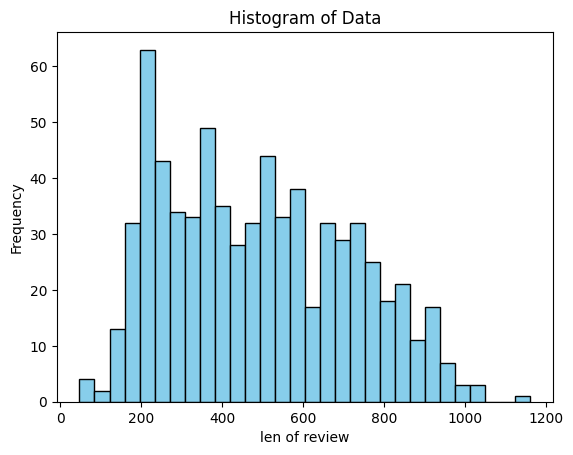

In [10]:

df_len = df.Review.apply(len)
print(df_len.describe())
plt.hist(df_len, bins=30, color='skyblue', edgecolor='black')  # 데이터와 bin 개수, 색상, 테두리색상 설정
plt.xlabel('len of review')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정
plt.show()  # 그래프 출력


(-0.5, 799.5, 599.5, -0.5)

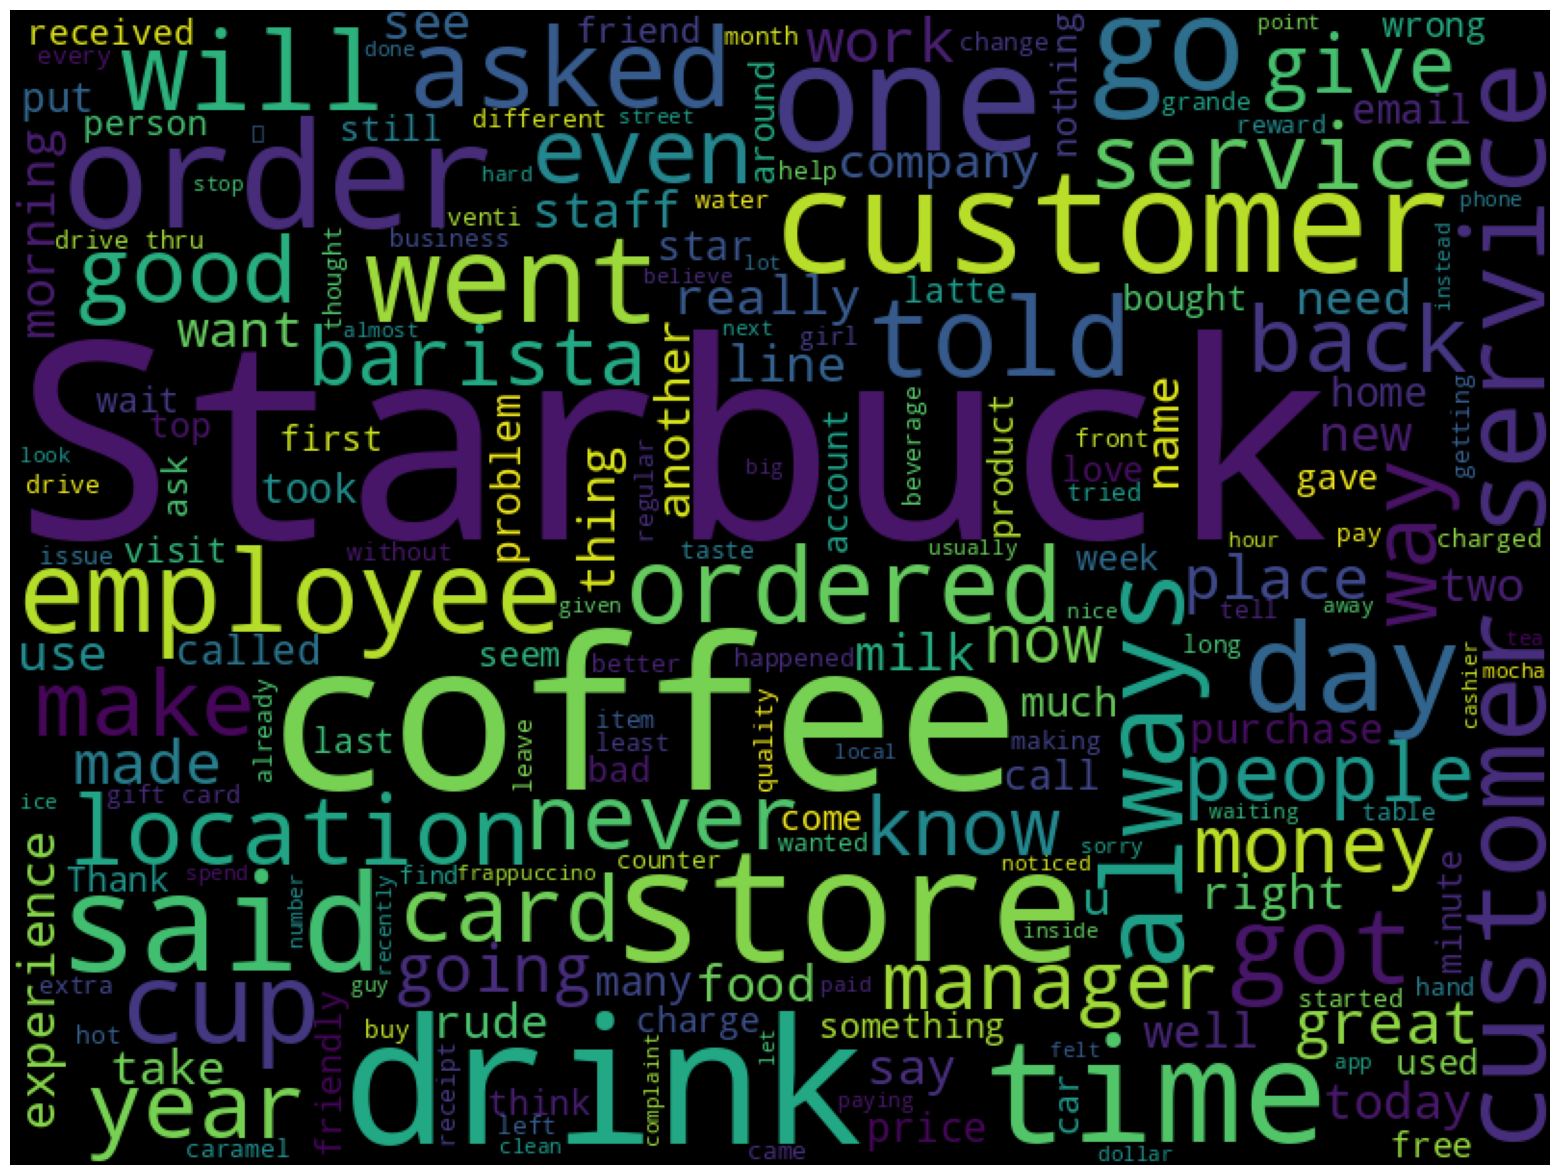

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(df['Review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

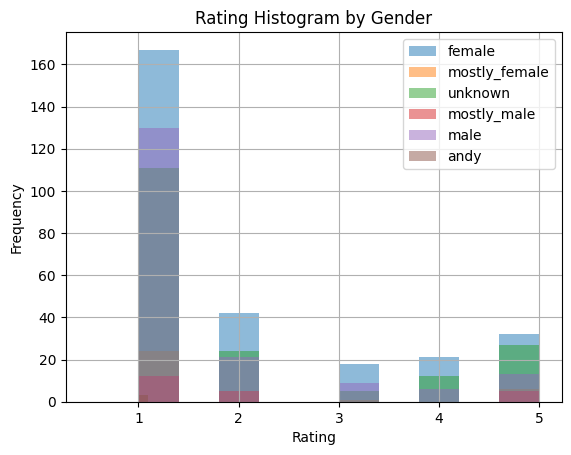

In [96]:
import matplotlib.pyplot as plt

# 'Gender' 열의 모든 값에 대해
for gender in df['get_gender'].unique():
    # 해당 'Gender' 값을 가진 행의 'Rating' 히스토그램을 그립니다.
    df[df['get_gender'] == gender]['Rating'].hist(alpha=0.5, bins=10, label=gender)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram by Gender')
plt.legend()
plt.show()


8     83
9     82
11    61
12    60
10    56
7     53
2     53
5     52
4     52
3     52
6     48
1     47
Name: mnth_num, dtype: int64


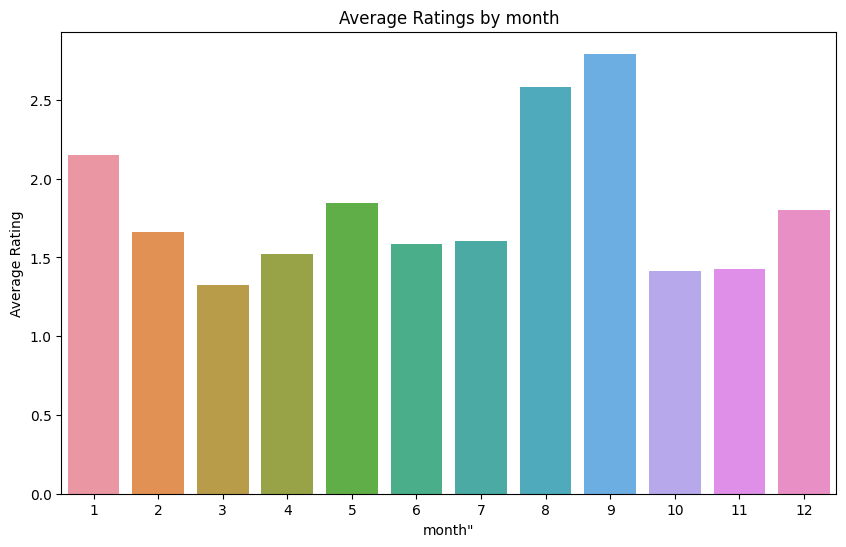

In [13]:
print(df['mnth_num'].value_counts())
average_ratings = df.groupby('mnth_num')['Rating'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ratings, x='mnth_num', y='Rating')
plt.title('Average Ratings by month')
plt.xlabel('month"')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-14-6d8701039c6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


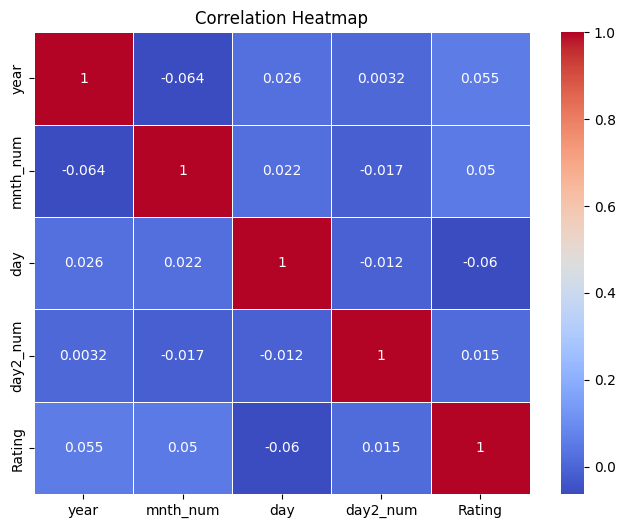

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df.columns

Index(['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num',
       'Rating', 'Review', 'get_gender'],
      dtype='object')

In [16]:
from plotly.express import bar
bar(data_frame=df['name'].value_counts().to_frame())

In [17]:
# 맨뒤 알파벳 두글자로 지역
df['newloc'] = df['location'].str[-2:]
df.newloc.unique()

<ipython-input-17-0cd902444545>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'er', 'CA', 'OH', 'HI',
       'NJ', 'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI', 'NH',
       'AR', 'MN', 'IN', 'MO', 'IL', 'MI', 'CO', 'OK', 'UT', 'KY', 'ME',
       'KS', 'ON', 'BC', 'NY', 'NE', 'AK', 'AB', 'ID', 'ER', 'da', 'LA',
       'UK', 'om', 'MB', 'SK', 'ia', 'ng', 'an', 'na', 'NL', 'NM', 'ta',
       'la', 'WV', 'i.', 'ne', 'rk', 'NS', 'ND', 'do', 'RI', 'SC', 'WY',
       'MS', 'AL', 'QC', 'MT', 'CT', 'ca', 'tx', 'fl', 'ma', 'ED', 'oh'],
      dtype=object)

In [18]:
#소문자는 else로 취급
df['newloc'] = df['newloc'].apply(lambda x: x if x.isupper() else 'else')
df.newloc.unique()

<ipython-input-18-ca19595acb11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'else', 'CA', 'OH', 'HI',
       'NJ', 'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI', 'NH',
       'AR', 'MN', 'IN', 'MO', 'IL', 'MI', 'CO', 'OK', 'UT', 'KY', 'ME',
       'KS', 'ON', 'BC', 'NY', 'NE', 'AK', 'AB', 'ID', 'ER', 'LA', 'UK',
       'MB', 'SK', 'NL', 'NM', 'WV', 'NS', 'ND', 'RI', 'SC', 'WY', 'MS',
       'AL', 'QC', 'MT', 'CT', 'ED'], dtype=object)

In [19]:
#CA 가 매우 많음
bar(data_frame=df['newloc'].value_counts().to_frame())

In [20]:
df[df['newloc']=='CA']['Rating'].value_counts().to_frame()

,Rating
1.0,86
2.0,24
4.0,11
5.0,9
3.0,8


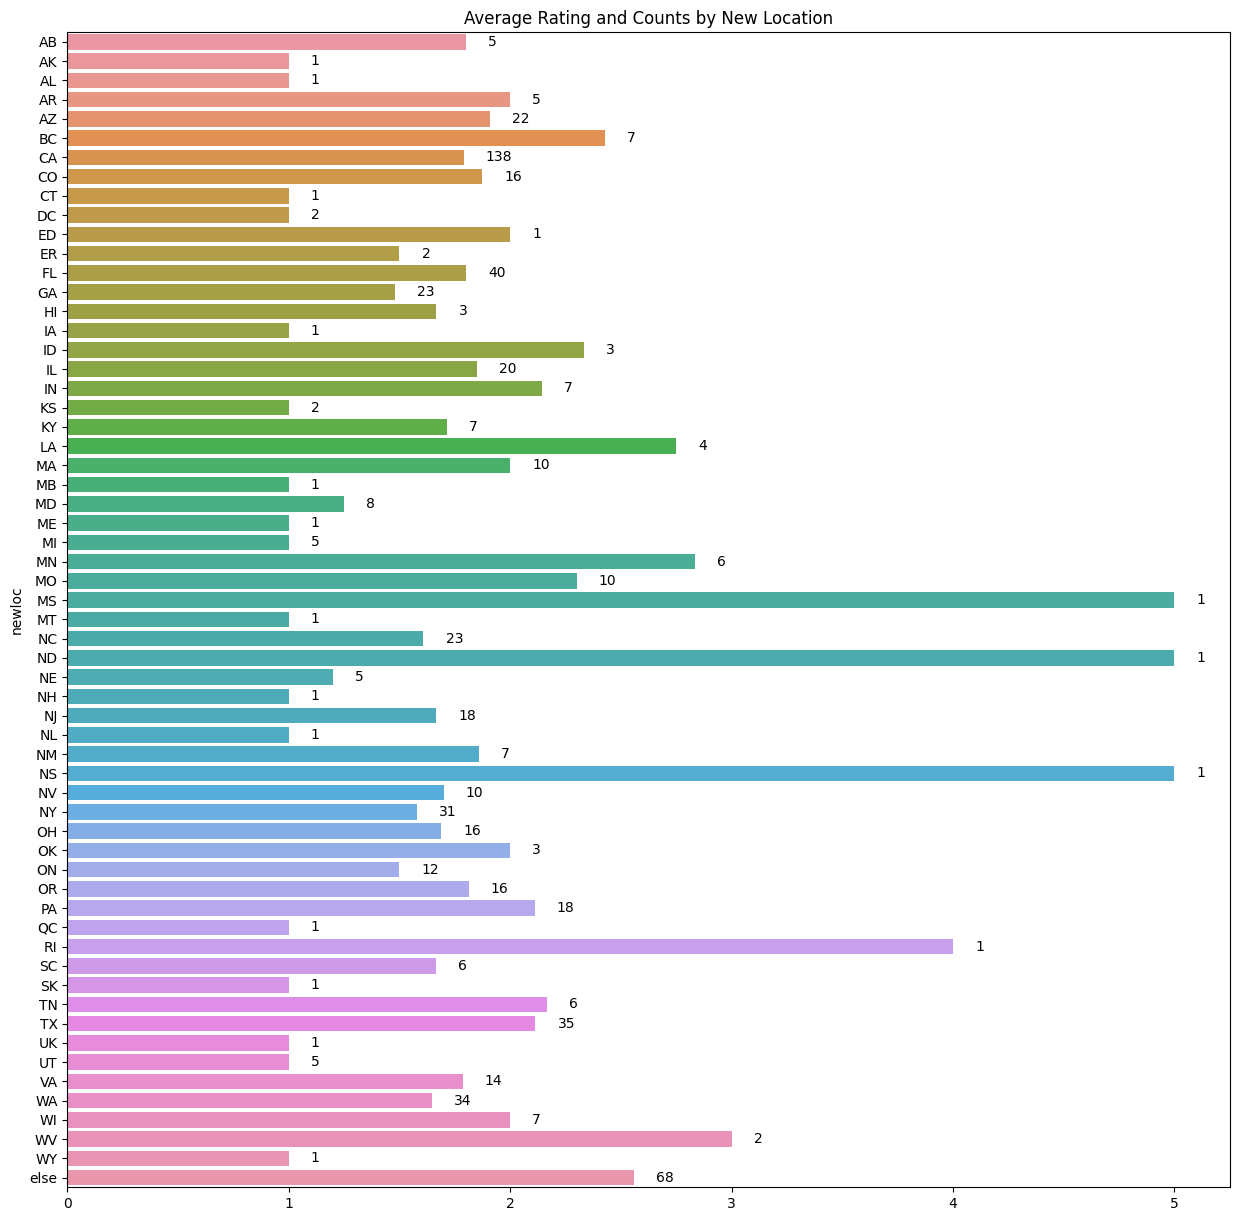

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'newloc' 별로 평균 'Rating'과 관측치 수 계산
average_rating = df.groupby('newloc')['Rating'].mean()
counts = df['newloc'].value_counts()

# 가로 막대그래프 생성
plt.figure(figsize=(15,15))
bar = sns.barplot(y=average_rating.index, x=average_rating.values, orient='h')
plt.title('Average Rating and Counts by New Location')

# 각 막대에 관측치 수 표시
for i, p in enumerate(bar.patches):
    width = p.get_width()
    bar.text(width + 0.1, p.get_y()+p.get_height()/2.,
             counts[average_rating.index[i]], va="center")

plt.show()


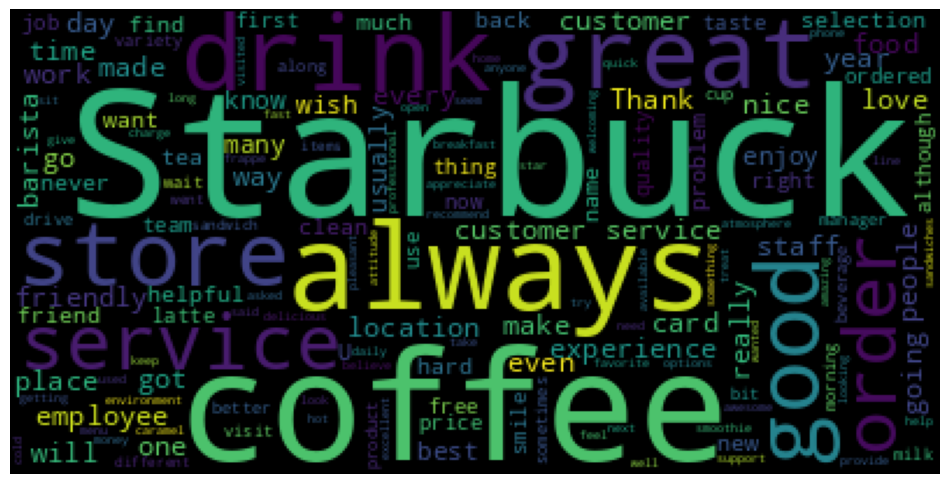

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from matplotlib.pyplot import subplots
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] > 3]['Review'].values.tolist())))

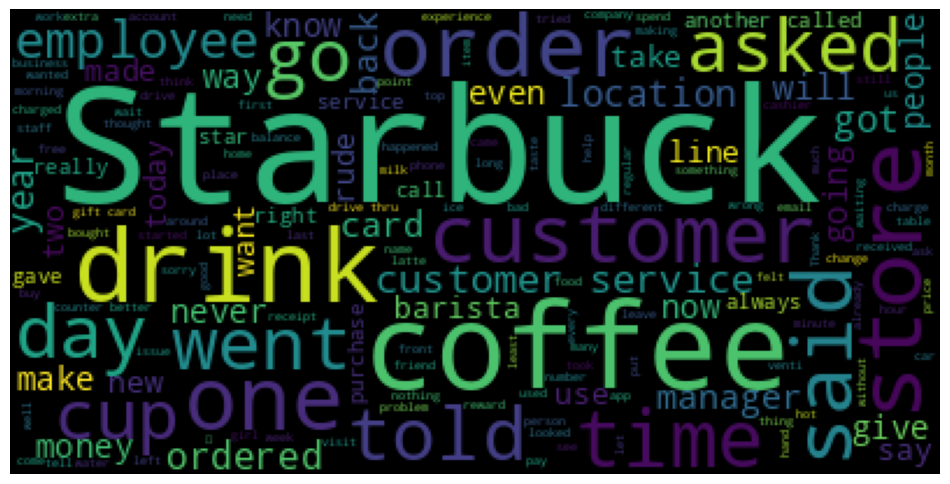

In [23]:
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] ==1]['Review'].values.tolist())))

## 토픽모델링

In [24]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#LDA 모델

In [25]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer


# nltk 불용어
stop_words = set(stopwords.words('english'))

# 표제어 추출을 위한 레마타이저를 생성합니다.
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # 특수문자 제거
    text = text.lower() # 소문자 변환
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if len(word) > 2]
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # 표제어 추출
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거

    return tokens

# 'Review' 컬럼 데이터 토큰화 및 불용어 제거
df['tokens'] = df['Review'].apply(remove_stopwords)


# 사전 생성
dictionary = corpora.Dictionary(df['tokens'] )

# 빈도가 낮은 단어 제거
dictionary.filter_extremes(no_below=15, no_above=0.5)

# 단어 빈도 계산
corpus = [dictionary.doc2bow(text) for text in df['tokens'] ]

# TF-IDF 모델 생성 및 코퍼스 변환
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# LDA 모델 생성
lda_model = models.LdaModel(corpus_tfidf, num_topics=12, id2word=dictionary, chunksize=2000, passes=10)

# 토픽 출력
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


<ipython-input-25-79ef7eafd31c>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0, '0.011*"store" + 0.010*"manager" + 0.010*"said" + 0.010*"coffee" + 0.010*"customer" + 0.009*"year" + 0.008*"one" + 0.008*"time" + 0.008*"car" + 0.008*"drink"')
(1, '0.015*"beverage" + 0.015*"ordered" + 0.014*"anyone" + 0.014*"different" + 0.014*"told" + 0.013*"gave" + 0.013*"service" + 0.012*"coffee" + 0.010*"take" + 0.010*"see"')
(2, '0.024*"love" + 0.022*"flavor" + 0.020*"working" + 0.018*"hard" + 0.017*"along" + 0.016*"employee" + 0.016*"wish" + 0.016*"work" + 0.015*"made" + 0.014*"customer"')
(3, '0.016*"drink" + 0.015*"wrong" + 0.015*"sandwich" + 0.013*"get" + 0.012*"always" + 0.012*"every" + 0.012*"usually" + 0.012*"cold" + 0.012*"order" + 0.012*"good"')
(4, '0.024*"girl" + 0.018*"drink" + 0.017*"rude" + 0.017*"barista" + 0.017*"window" + 0.014*"name" + 0.014*"location" + 0.013*"around" + 0.013*"employee" + 0.012*"said"')
(5, '0.023*"second" + 0.019*"food" + 0.016*"located" + 0.015*"inside" + 0.012*"name" + 0.012*"went" + 0.011*"thats" + 0.010*"put" + 0.009*"get" + 0.009*"cof

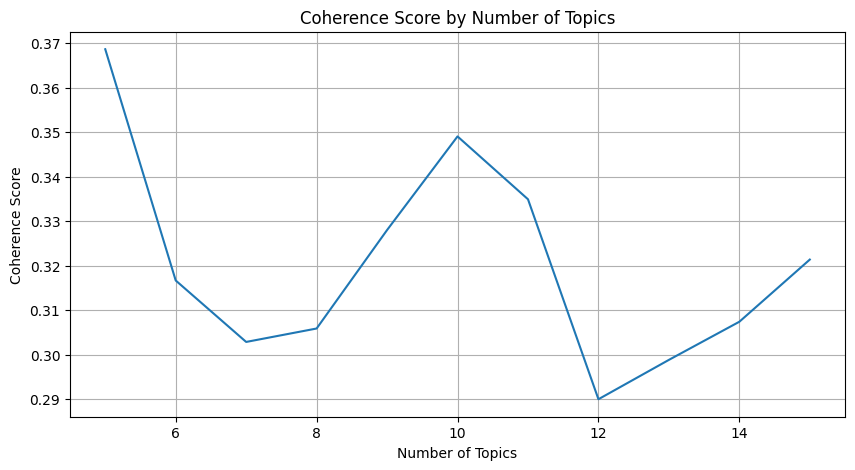

(0, '0.028*"card" + 0.017*"star" + 0.012*"customer" + 0.012*"reward" + 0.012*"account" + 0.010*"called" + 0.010*"email" + 0.010*"gift" + 0.009*"service" + 0.009*"day"')
(1, '0.015*"coffee" + 0.013*"said" + 0.013*"cup" + 0.012*"ordered" + 0.011*"went" + 0.011*"drink" + 0.010*"asked" + 0.010*"caramel" + 0.009*"milk" + 0.008*"barista"')
(2, '0.013*"drive" + 0.012*"drink" + 0.012*"order" + 0.011*"got" + 0.010*"line" + 0.010*"lady" + 0.010*"thru" + 0.009*"today" + 0.009*"said" + 0.009*"people"')
(3, '0.013*"coffee" + 0.011*"always" + 0.011*"service" + 0.011*"drink" + 0.011*"employee" + 0.010*"like" + 0.010*"customer" + 0.009*"get" + 0.009*"one" + 0.009*"make"')
(4, '0.018*"store" + 0.016*"breakfast" + 0.016*"great" + 0.013*"flavor" + 0.013*"sandwich" + 0.013*"choice" + 0.012*"food" + 0.012*"coffee" + 0.012*"many" + 0.011*"also"')


In [26]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# 주제 수와 일관성 점수를 저장할 리스트를 생성합니다.
num_topics_list = []
coherence_score_list = []

# 주제 수에 대해 다양한 LDA 모델 생성 및 일관성 점수 계산
for num_topics in range(5, 16):
    lda_model = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, chunksize=2000, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # 결과를 리스트에 추가합니다.
    num_topics_list.append(num_topics)
    coherence_score_list.append(coherence_lda)

# 일관성 점수를 시각화합니다.
plt.figure(figsize=(10, 5))
plt.plot(num_topics_list, coherence_score_list)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics')
plt.grid(True)
plt.show()

# 최적의 주제 수를 가진 LDA 모델 생성
optimal_num_topics = num_topics_list[np.argmax(coherence_score_list)]
lda_model_optimal = models.LdaModel(corpus_tfidf, num_topics=optimal_num_topics, id2word=dictionary, chunksize=2000, passes=10)

# 토픽 출력
topics = lda_model_optimal.print_topics()
for topic in topics:
    print(topic)


In [27]:
import numpy as np

# 최고 일관성 점수를 가진 인덱스 찾기
max_coherence_idx = np.argmax(coherence_score_list)

# 최고 일관성 점수와 해당 주제 수 출력
print(f'최고 일관성 점수: {coherence_score_list[max_coherence_idx]}')
print(f'해당 주제 수: {num_topics_list[max_coherence_idx]}')

최고 일관성 점수: 0.36868263978435045
해당 주제 수: 5


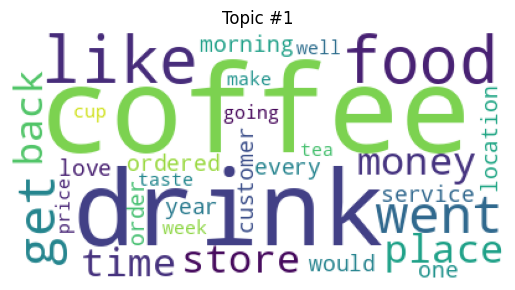

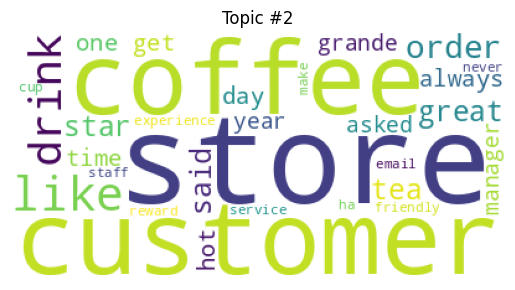

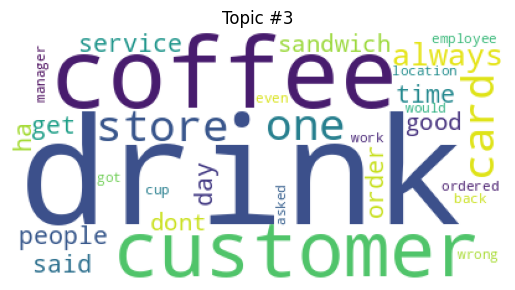

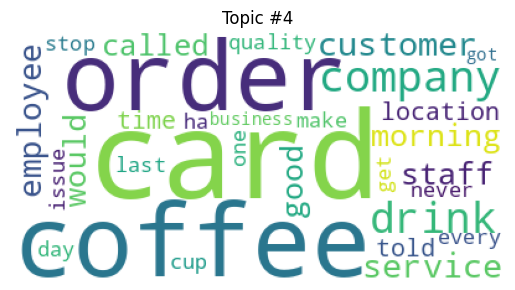

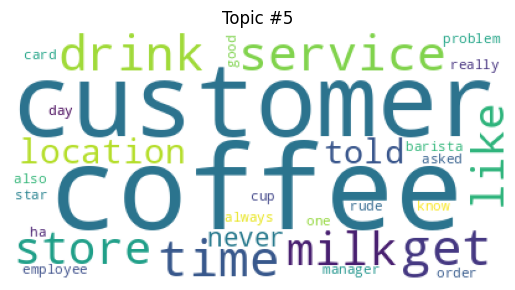

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 가장 일관성 점수가 높은 주제 수를 선택하여 LDA 모델 생성
optimal_num_topics = num_topics_list[max_coherence_idx]# 이 값을 적절한 주제 수로 변경하세요.
lda_model = models.LdaModel(corpus_tfidf, num_topics=optimal_num_topics, id2word=dictionary, chunksize=2000, passes=1)

# 각 주제에 대해 워드 클라우드 생성
for i in range(optimal_num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()


#NMF 모델

In [29]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# 불용어 제거와 표제어 추출을 수행한 토큰을 다시 문장으로 변환합니다.
texts = df['tokens'].apply(' '.join)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.5, min_df=15)
tfidf = vectorizer.fit_transform(texts)

# NMF 모델 생성 및 학습
n_topics = 6  # 토픽의 개수를 설정합니다.
nmf = NMF(n_components=n_topics, random_state=0)
nmf.fit(tfidf)

# 토픽과 키워드 출력
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# 각 문서의 토픽 예측
topic_values = nmf.transform(tfidf)

# 가장 확률이 높은 토픽을 선택
topics = topic_values.argmax(axis=1)

# 원본 데이터프레임에 'Topic' 컬럼으로 저장
df['Topic'] = topics


Topic #1
customer service store location year great ha star time staff
Topic #2
card gift account balance email credit called use told received
Topic #3
coffee cup good taste store hot home cream way shop
Topic #4
said went asked order manager told ordered back got time
Topic #5
drink milk ice free ordered get price time really latte
Topic #6
always like get employee place one every even time never


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

<ipython-input-29-341ca2d7b311>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#K-means clustering

In [30]:
!pip install soyclustering

In [60]:
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
from soyclustering import SphericalKMeans
import torch
import pandas as pd
import numpy as np

# BERT 모델과 토크나이저 초기화
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 'Review' 컬럼의 리뷰 데이터를 BERT를 사용하여 벡터로 변환
embeddings = []
for review in df['Review']:
    inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state[:, 0, :].numpy().mean(axis=1))

# numpy array로 변환
embeddings = np.vstack(embeddings)


In [71]:
# Spherical K-means 클러스터링
n_clusters = 4 # 클러스터의 개수를 설정합니다.
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(embeddings)

# 클러스터 할당
df['Cluster'] = kmeans.labels_

# 결과 출력
for i, cluster in enumerate(df['Cluster']):
    print(f"리뷰 {i}는 클러스터 {cluster}에 속해 있습니다.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



리뷰 0는 클러스터 0에 속해 있습니다.
리뷰 1는 클러스터 2에 속해 있습니다.
리뷰 2는 클러스터 0에 속해 있습니다.
리뷰 3는 클러스터 0에 속해 있습니다.
리뷰 4는 클러스터 2에 속해 있습니다.
리뷰 5는 클러스터 0에 속해 있습니다.
리뷰 6는 클러스터 0에 속해 있습니다.
리뷰 7는 클러스터 3에 속해 있습니다.
리뷰 8는 클러스터 0에 속해 있습니다.
리뷰 9는 클러스터 1에 속해 있습니다.
리뷰 10는 클러스터 0에 속해 있습니다.
리뷰 11는 클러스터 3에 속해 있습니다.
리뷰 12는 클러스터 0에 속해 있습니다.
리뷰 13는 클러스터 0에 속해 있습니다.
리뷰 14는 클러스터 0에 속해 있습니다.
리뷰 15는 클러스터 0에 속해 있습니다.
리뷰 16는 클러스터 1에 속해 있습니다.
리뷰 17는 클러스터 2에 속해 있습니다.
리뷰 18는 클러스터 2에 속해 있습니다.
리뷰 19는 클러스터 2에 속해 있습니다.
리뷰 20는 클러스터 2에 속해 있습니다.
리뷰 21는 클러스터 2에 속해 있습니다.
리뷰 22는 클러스터 0에 속해 있습니다.
리뷰 23는 클러스터 2에 속해 있습니다.
리뷰 24는 클러스터 2에 속해 있습니다.
리뷰 25는 클러스터 3에 속해 있습니다.
리뷰 26는 클러스터 2에 속해 있습니다.
리뷰 27는 클러스터 0에 속해 있습니다.
리뷰 28는 클러스터 0에 속해 있습니다.
리뷰 29는 클러스터 2에 속해 있습니다.
리뷰 30는 클러스터 1에 속해 있습니다.
리뷰 31는 클러스터 1에 속해 있습니다.
리뷰 32는 클러스터 2에 속해 있습니다.
리뷰 33는 클러스터 0에 속해 있습니다.
리뷰 34는 클러스터 1에 속해 있습니다.
리뷰 35는 클러스터 0에 속해 있습니다.
리뷰 36는 클러스터 1에 속해 있습니다.
리뷰 37는 클러스터 2에 속해 있습니다.
리뷰 38는 클러스터 2에 속해 있습니다.
리뷰 39는 클러스터 3에 속해 있습니다.
리뷰 40는 클러스터 1에 속해 있습니다.
리뷰 41는 클러스터 0에 속해 있습니다.
리뷰

In [72]:
df['Cluster'].value_counts()

2    276
0    207
1    133
3     83
Name: Cluster, dtype: int64

In [73]:
for i in range(n_clusters):
    # 특정 클러스터에 속한 리뷰들을 선택하고, 그 중 첫 5개만 선택합니다.
    cluster_reviews = df[df['Cluster'] == i]['Review'].head(5)

    print(f"===== Cluster {i} =====")
    # 선택한 리뷰들을 출력합니다.
    for review in cluster_reviews:
        print(review)
    print("\n")


===== Cluster 0 =====
Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.
I just wanted to go out of my way to recognize a Starbucks employee Billy at the Franklin Park location! I was running late to work & placed an order at the wrong location and not only did he make my order with a smile he made it within 60 seconds! Thank you SOO much I was having a bad morning and people like you just make this world a better place.
Me and my friend were at Starbucks and my card didn?셳 work. Thankful the worker there, paid for our drinks. And was very nice about it, it didn?셳 seem to bother him that he paid for our drinks. This made my day, but made me look like a fool because my card didn?셳 work. All thanks to Dillon. At

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# nltk 라이브러리에서 영어 불용어 리스트를 불러옵니다.
english_stopwords = stopwords.words('english')

n_clusters = 4  # 클러스터의 개수 입니다.
n_keywords = 10  # 각 클러스터에서 추출할 키워드의 개수 입니다.

# 불용어를 설정합니다.
vectorizer = TfidfVectorizer(stop_words=english_stopwords)

for i in range(n_clusters):
    # 특정 클러스터에 속한 리뷰들을 선택합니다.
    cluster_reviews = df[df['Cluster'] == i]['Review']

    # TF-IDF를 계산합니다.
    tfidf = vectorizer.fit_transform(cluster_reviews)

    # 각 단어의 TF-IDF 점수를 계산합니다.
    word_scores = {word: tfidf.getcol(idx).sum() for word, idx in vectorizer.vocabulary_.items()}

    # TF-IDF 점수가 가장 높은 단어들을 선택합니다.
    sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

    print(f"===== Cluster {i} =====")
    for word, score in sorted_word_scores[:n_keywords]:
        print(f"{word}: {score}")
    print("")


===== Cluster 0 =====
starbucks: 11.111245162443119
coffee: 8.884050810516108
like: 5.849401037010004
order: 5.6833353776647595
drink: 5.536082650380255
service: 5.392117060063404
customer: 5.389110065187601
card: 5.358493905851203
get: 5.005222448487708
always: 4.9214514117527015

===== Cluster 1 =====
starbucks: 7.000954117996994
coffee: 5.427753969011764
service: 3.8265606523621725
customer: 3.8046888224303936
drink: 3.582704410192925
time: 3.3689290686067705
one: 3.3634073045383546
said: 3.1860927393621017
get: 3.176446155361214
store: 2.7413706940787166

===== Cluster 2 =====
starbucks: 15.394391258327198
coffee: 13.188153310875407
store: 7.8577760073687095
get: 7.711208877244057
service: 7.4362697801283755
customer: 7.329665767311933
go: 7.1118114980286755
drink: 6.75290420295673
one: 6.286276130807664
like: 6.236018414668369

===== Cluster 3 =====
starbucks: 4.0442668268812145
coffee: 4.041067003545563
drink: 3.4614955589431227
time: 2.8806153388901667
get: 2.80427791007752
cust

In [31]:
from sklearn.cluster import KMeans
from soyclustering import SphericalKMeans
# 불용어 제거와 표제어 추출을 수행한 토큰을 다시 문장으로 변환합니다.
texts = df['tokens'].apply(' '.join)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.5, min_df=15)
tfidf = vectorizer.fit_transform(texts)

# K-means 클러스터링
n_clusters = 6  # 클러스터의 개수를 설정합니다.
kmeans = SphericalKMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)

# 클러스터 할당
df['Cluster'] = kmeans.labels_

# 각 클러스터에서 가장 많이 등장하는 단어들 찾기
for i in range(n_clusters):
    df_cluster = df[df['Cluster'] == i]
    text_cluster = " ".join(df_cluster['tokens'].apply(' '.join))
    text_cluster_list = text_cluster.split()

    # 단어 빈도 계산
    word_freq = {}
    for word in text_cluster_list:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

    # 빈도수가 가장 높은 상위 10개 단어 출력
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    print(f"Cluster #{i + 1}")
    print(" ".join([word for word, freq in sorted_word_freq[:10]]))


Cluster #1
drink wa starbucks coffee get time one order like ordered
Cluster #2
coffee starbucks wa get time store like year even one
Cluster #3
starbucks card wa customer time star account called day service
Cluster #4
wa starbucks said coffee order asked went time get store
Cluster #5
starbucks sandwich wa coffee one good food like service breakfast
Cluster #6
customer starbucks wa service store time location order always ha


<ipython-input-31-d8984045ea36>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-32-5789e6b5aa88>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



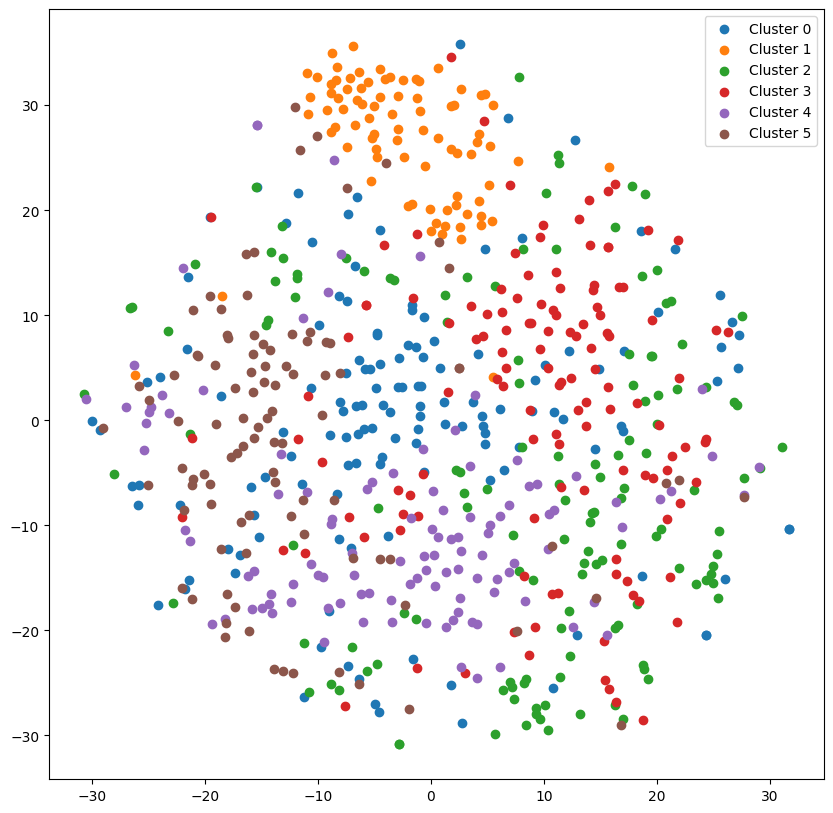

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 불용어 제거와 표제어 추출을 수행한 토큰을 다시 문장으로 변환합니다.
texts = df['tokens'].apply(' '.join)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.5, min_df=15)
tfidf = vectorizer.fit_transform(texts)

# K-means 클러스터링
n_clusters = 6  # 클러스터의 개수를 설정합니다.
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)

# 클러스터 할당
df['Cluster'] = kmeans.labels_

# T-SNE를 사용해 차원 축소
tsne = TSNE(n_components=2, random_state=0)
tfidf_tsne = tsne.fit_transform(tfidf.toarray())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 10))
for i in range(n_clusters):
    cluster_points = tfidf_tsne[df['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend()
plt.show()


#직원에 대한 평가, 가격에 대한 평가

In [89]:
price_keywords = [
    'price', 'cost', 'expensive', 'cheap', 'value', 'worth',
    'overpriced', 'affordable', 'budget', 'economical', 'inexpensive',
    'reasonable', 'unreasonable', 'pricing', 'costly',
    'bargain', 'discount', 'premium', 'deal', 'savings', 'economy',
    'fair', 'rip-off'
]

rows_with_price = df[df['Review'].str.contains('|'.join(price_keywords), case=False)]

print("가격에 관련된 리뷰의 행 번호:")
print(rows_with_price.index)

가격에 관련된 리뷰의 행 번호:
Int64Index([ 20,  21,  28,  32,  49,  50,  54,  58,  64,  66,
            ...
            625, 629, 633, 649, 654, 670, 672, 685, 687, 695],
           dtype='int64', length=137)


In [91]:
staff_keywords = [
    'staff', 'employee', 'worker', 'service', 'attendant',
    'manager', 'crew', 'personnel', 'team', 'customer service', 'rude', 'polite',
    'friendly', 'unfriendly', 'helpful', 'unhelpful', 'attentive', 'inattentive',
    'courteous', 'professional', 'unprofessional', 'welcoming', 'unwelcoming',
    'warm', 'cold', 'kind', 'unkind', 'respectful', 'disrespectful',
]

rows_with_staff = df[df['Review'].str.contains('|'.join(staff_keywords), case=False)]

print("직원에 관련된 리뷰의 행 번호:")
print(rows_with_staff.index)


직원에 관련된 리뷰의 행 번호:
Int64Index([  0,   1,   2,   3,   4,   5,   9,  10,  12,  14,
            ...
            681, 683, 686, 689, 690, 693, 694, 695, 698, 699],
           dtype='int64', length=405)


#transformer 사용해보기

In [35]:
!pip install transformers
from transformers import pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.5 MB/s eta 0:00:00


In [99]:
from transformers import pipeline

# 감정 분석을 위한 파이프라인을 할당합니다.
classifier = pipeline('sentiment-analysis')

# 감정 분석 결과를 저장할 리스트를 생성합니다.
sentiments = []

# 각 리뷰에 대해 감정 분석을 수행합니다.
for i in df.index:
    result = classifier(df['Review'][i])
    # 감정 분석 결과를 리스트에 추가합니다.
    sentiments.append(result[0]['label'])

# 감정 분석 결과를 새로운 컬럼으로 추가합니다.
df['Sentiment'] = sentiments


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [100]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review,get_gender,Cluster,Sentiment
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...,female,0,POSITIVE
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...,mostly_female,2,POSITIVE
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...,unknown,0,NEGATIVE
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...,mostly_male,0,NEGATIVE
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...,unknown,2,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",2011,10,2,6,1.0,I ordered Via Starbucks coffee online. I recei...,female,0,NEGATIVE
697,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",2011,8,31,2,3.0,"My name is Ric **, I am journalist by professi...",unknown,1,NEGATIVE
698,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",2011,8,24,2,1.0,"The bagel was ice cold, not cut and not toasted.",female,3,NEGATIVE
699,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",2011,8,15,0,1.0,"In the morning of Monday, August 15, 2011, at ...",female,1,NEGATIVE


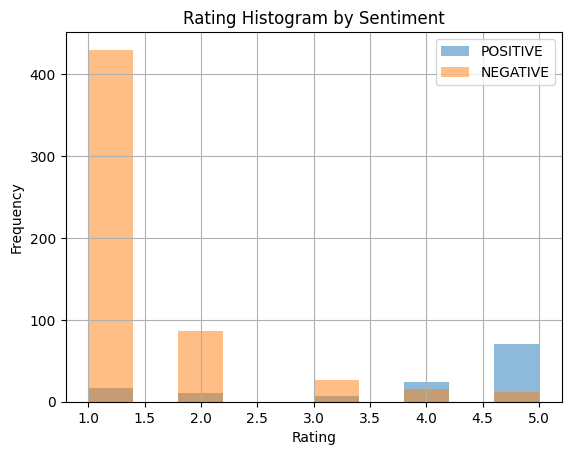

In [103]:
import matplotlib.pyplot as plt

# 'sentiment' 열의 모든 값에 대해
for sentiment in df['Sentiment'].unique():
    # 해당 'sentiment' 값을 가진 행의 'Rating' 히스토그램을 그립니다.
    df[df['Sentiment'] == sentiment]['Rating'].hist(alpha=0.5, bins=10, label=sentiment)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram by Sentiment')
plt.legend()
plt.show()
